In [2]:
import pandas as pd
import requests
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
def chunk_preprocessing(df):
    #print(df)
    med_lst_global=[]
    med_str_global=[]
    react_lst_global=[]
    react_str_global=[]
    for ind in range(0,df.shape[0]):
        med_str=''
        med_lst=[]
        react_str=''
        react_lst=[]
        for medicine in df['patient'].iloc[ind]['drug']:
            med_lst.append(medicine['medicinalproduct'])
        for reaction in df['patient'].iloc[ind]['reaction']:
            react_lst.append(reaction['reactionmeddrapt'])
        #Remove duplicates using set
        med_lst_global.append(list(set(med_lst)))
        react_lst_global.append(list(set(react_lst)))
        med_str_global.append(' '.join(list(set(med_lst))))
        react_str_global.append(' '.join(list(set(react_lst))))
    meds=zip(med_lst_global)
    med=pd.DataFrame(meds)
    med_df=pd.DataFrame(zip(med_str_global))
    #print(med)
    reacts=zip(react_lst_global)
    react=pd.DataFrame(reacts)
    react_df=pd.DataFrame(zip(react_str_global))
    try:
        ser=df['serious']
    except:
        ser=pd.DataFrame([np.nan]*df.shape[0])
    try:
        disabling=df['seriousnessdisabling']
    except:
        disabling=pd.DataFrame([np.nan]*df.shape[0])
    try:
        death=df['seriousnessdeath']
    except:
        death=pd.DataFrame([np.nan]*df.shape[0])
    country=df['occurcountry']
    df_prep=pd.concat([med,react,ser,death,disabling,country,med_df,react_df],axis=1,ignore_index=True)
    df_prep.rename(columns={0:'medications',1:'adverse_reactions',2:'serious',3:'death',4:'disabling',5:'country',6:'meds_str',7:'reacts_str'},inplace=True)
    flat_med_lst = []
    #Flatten the list 
    for n, row in df_prep.iterrows():
        for item in row['medications']:
            row['flat_meds'] = item
            flat_med_lst += [row.copy()]
    flat_med_df = pd.DataFrame(flat_med_lst)
    return df_prep, flat_med_df
    

def pull_data():
    pull_ind=0
    tot_df=pd.DataFrame()
    tot_df_flat=pd.DataFrame()
    for j in range(0,1000):
        page = requests.get('https://api.fda.gov/drug/event.json?api_key=CNCu31wY1rTtVzadzO39zfi0iUoOjVva3b0Wf2x2&limit=100&skip='+str(j*100))
        dat=page.json()
        try:
            df_chunk = pd.DataFrame(dat["results"])
        except:
            return tot_df,tot_df_flat
        df,df_flattened=chunk_preprocessing(df_chunk)
        tot_df=pd.concat([tot_df,df],ignore_index=True)
        tot_df_flat=pd.concat([tot_df_flat,df_flattened],ignore_index=True)
    return tot_df,tot_df_flat

tot_df,tot_df_flat=pull_data()

In [5]:
tot_df.to_csv('25100_dat.csv')

In [6]:
tot_df_flat.to_csv('25100_flat.csv')

In [4]:
print(tot_df)

                                             medications  \
0      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
1                                        [DURAGESIC-100]   
2                                               [BONIVA]   
3                                            [IBUPROFEN]   
4                                               [LYRICA]   
...                                                  ...   
25095                                 [ASPIRIN., PLAVIX]   
25096                                           [PLAVIX]   
25097                          [IMPLANON, PARAGARD 380A]   
25098      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
25099                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
1                  [DRUG ADMINISTRATION ERROR, OVERDOSE]       1     1   
2            [Vomiting, Arthralgia, Diarrhoea, Headache] 

In [11]:
print(tot_df.shape)

(25100, 8)


In [8]:
#Countries downloaded from 'https://developers.google.com/public-data/docs/canonical/countries_csv')


In [19]:
print(tot_df.iloc[0])

medications          [OFLOXACIN, ROCEPHIN, OROKEN (CEFIXIME, UNSPEC...
adverse_reactions             [OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]
serious                                                              1
death                                                              NaN
disabling                                                          NaN
country                                                            NaN
meds_str             OFLOXACIN ROCEPHIN OROKEN (CEFIXIME, UNSPEC) P...
reacts_str                        OEDEMA PERIPHERAL PURPURA ARTHRALGIA
Name: 0, dtype: object


In [8]:
print(tot_df_flat)

                                             medications  \
0      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
1      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
2      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
3      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
4                                        [DURAGESIC-100]   
...                                                  ...   
69448                                           [PLAVIX]   
69449                          [IMPLANON, PARAGARD 380A]   
69450                          [IMPLANON, PARAGARD 380A]   
69451      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
69452                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
1               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
2               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA] 

# NLP Analysis

In [3]:
tot_df=pd.read_csv('25100_dat.csv')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(25100, 7980)


NameError: name 'plt' is not defined

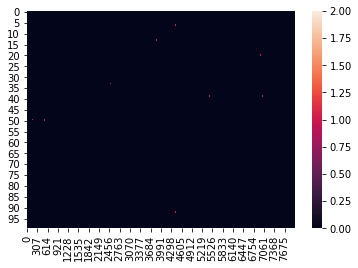

In [6]:
meds_str=tot_df['meds_str']
corpus=meds_str.values
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(X.shape)
import seaborn as sns
sns.heatmap(X.toarray()[:100,:])
plt.show()